# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

## Running Data

In [8]:
iris=pd.read_csv(r"C:\Users\Nishant Sharma\Downloads\IRIS.csv", encoding="unicode_escape")

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.shape

(150, 5)

## Checking for null values

In [11]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris_outcome=pd.crosstab(index=iris["species"], columns="count")
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Exploratory Data Analysis (EDA)

## Species Classification

<function matplotlib.pyplot.show(close=None, block=None)>

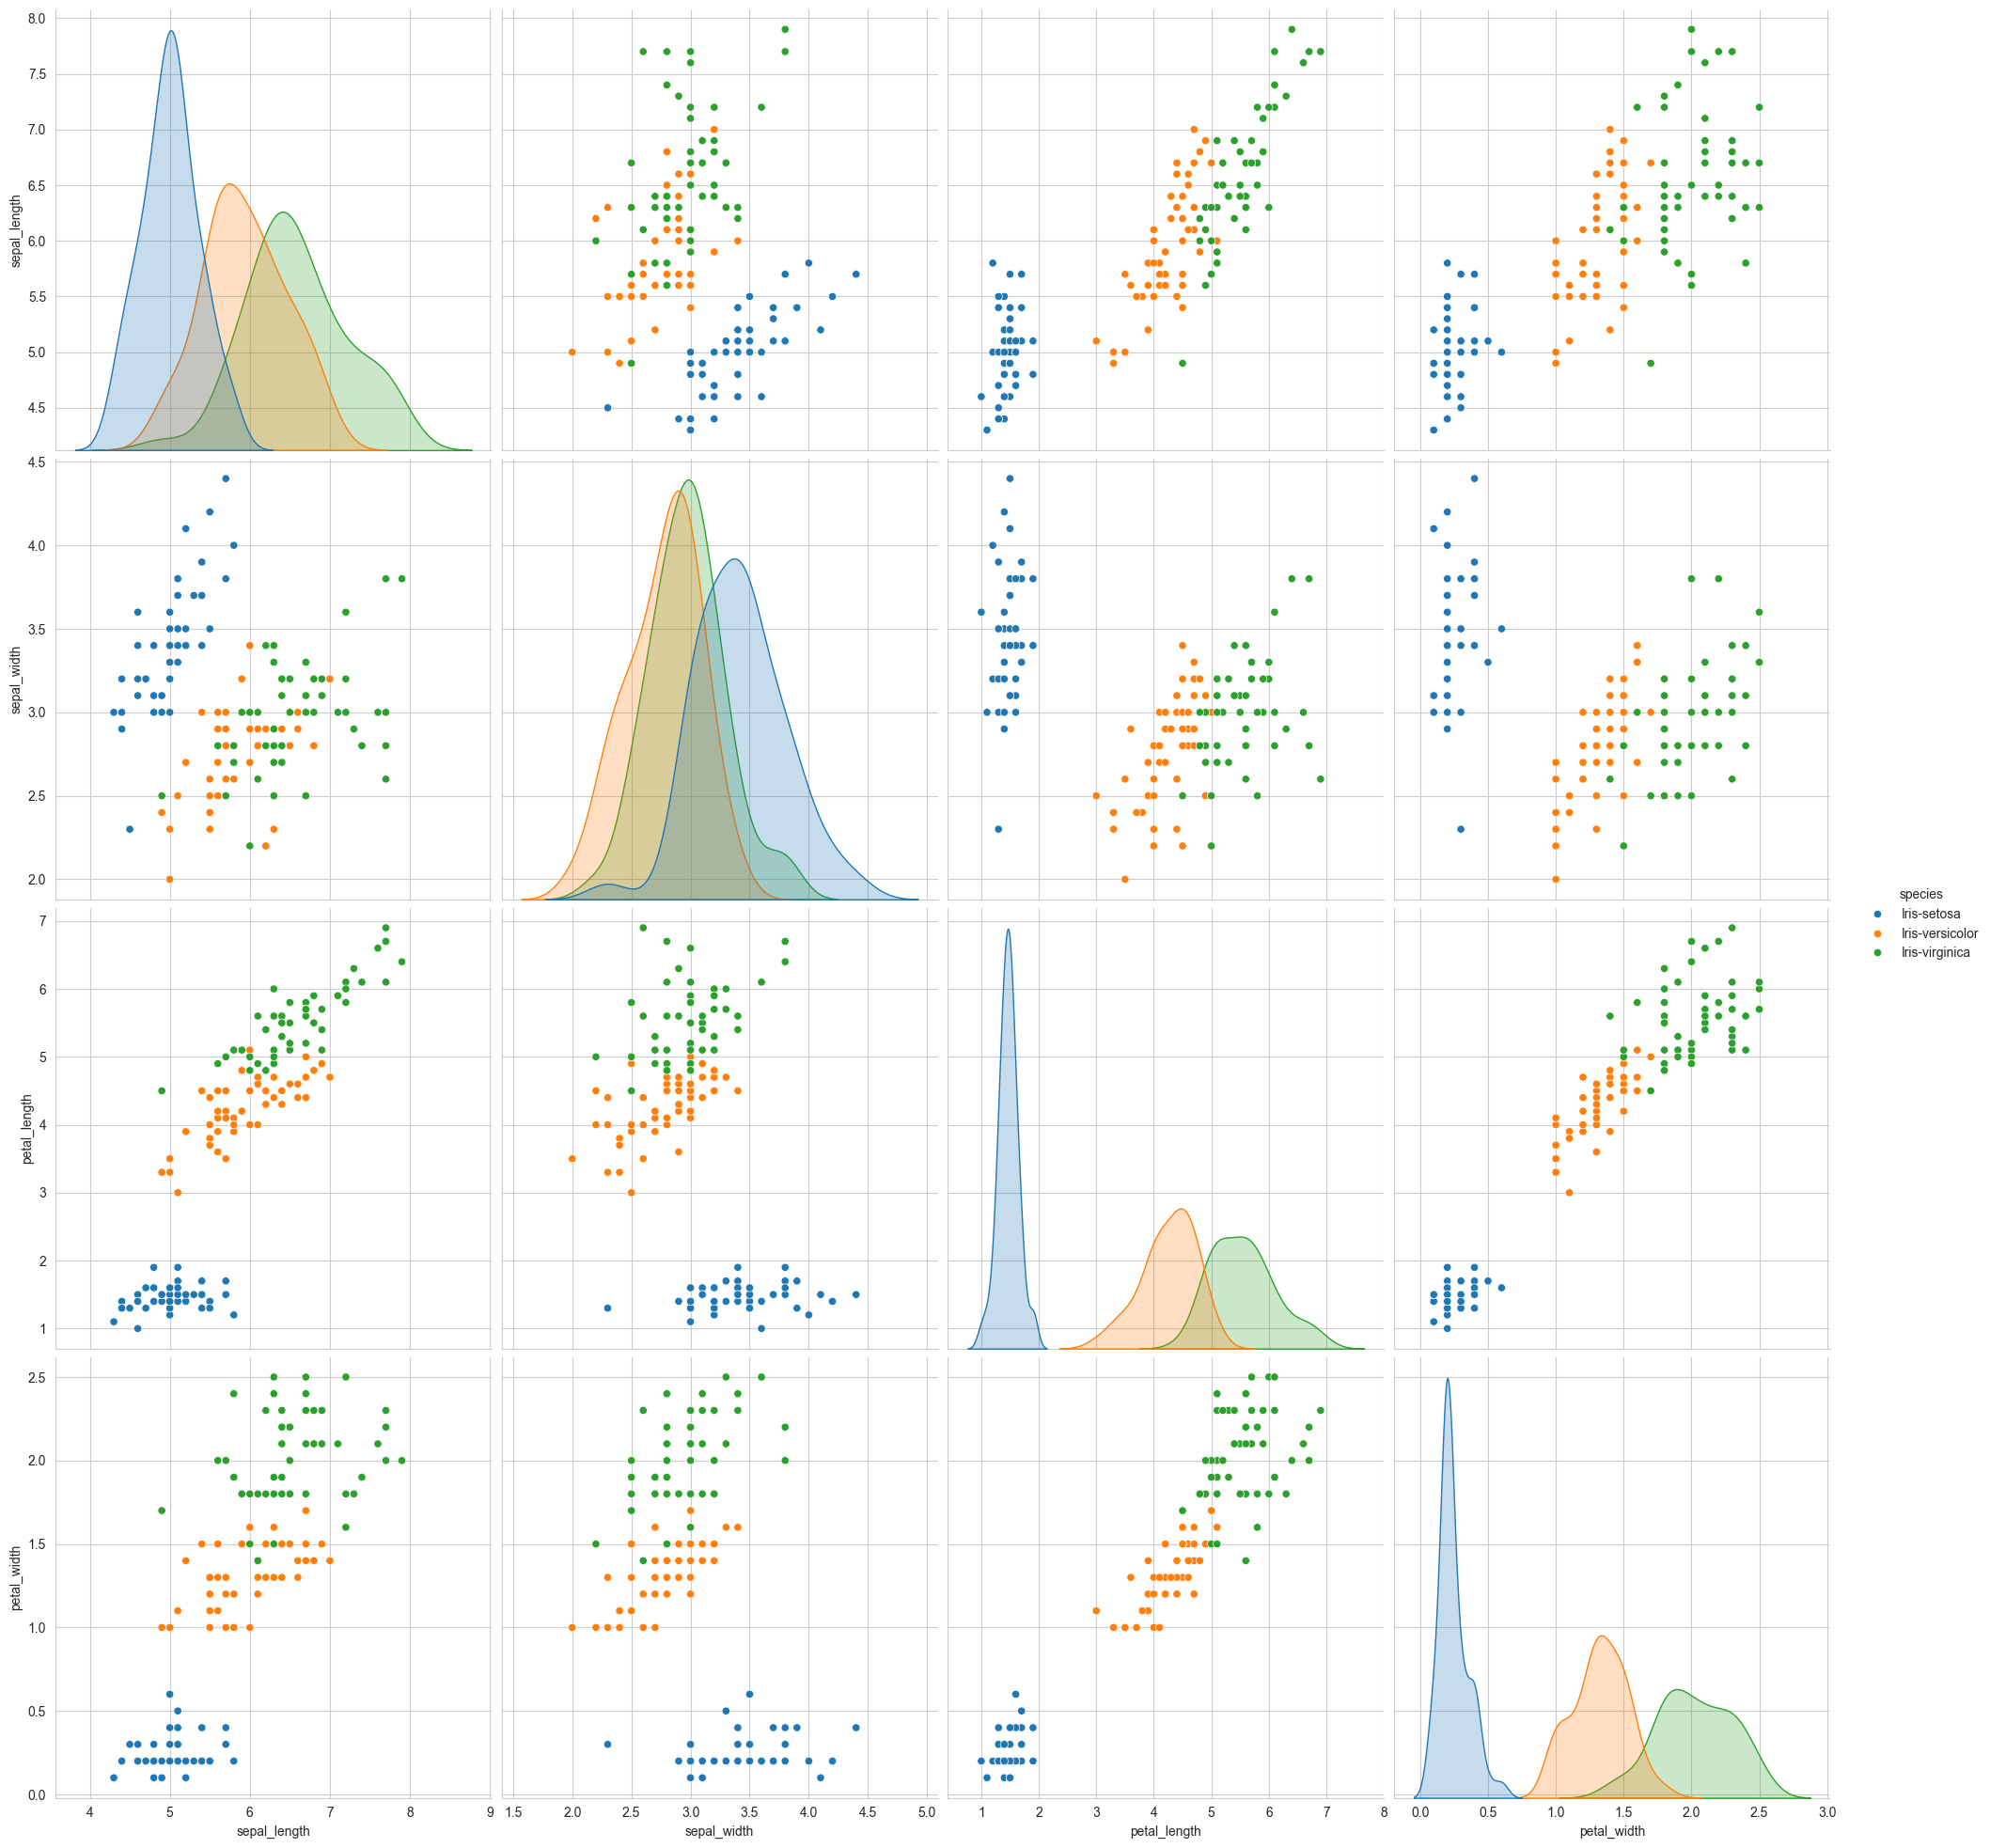

In [15]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue= "species", height=5);
plt.show

In [16]:
iris["sepal_length"].value_counts()

sepal_length
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

## Sepal and Petal Classification

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

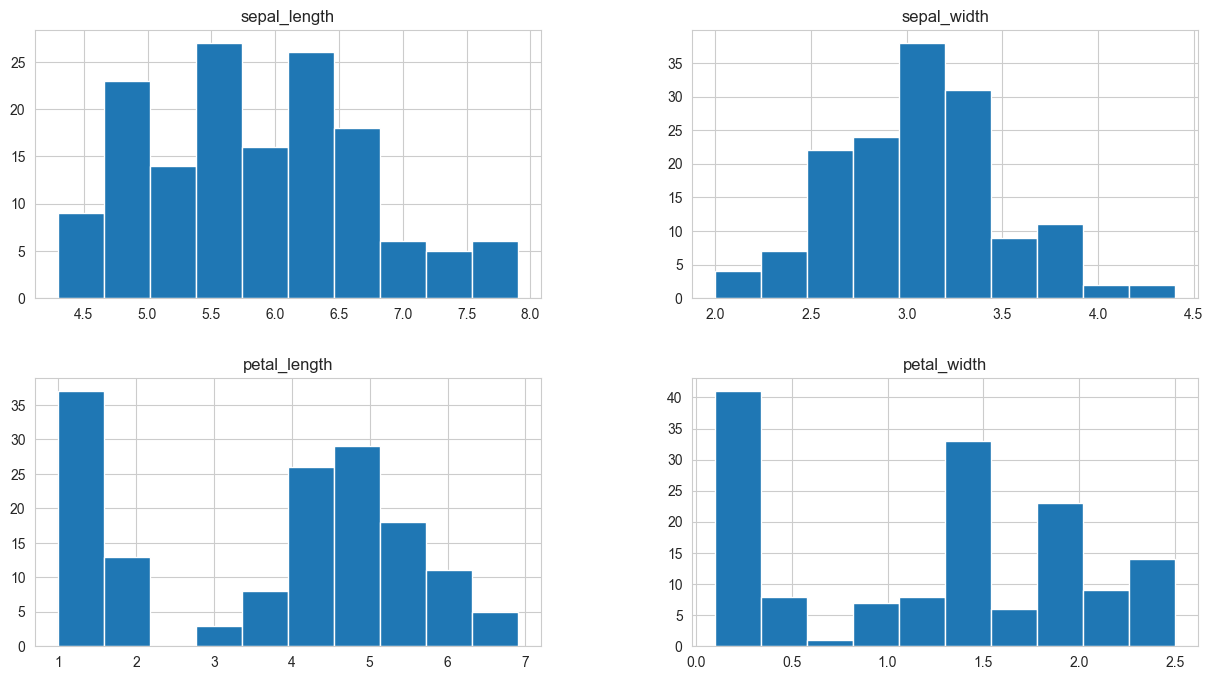

In [17]:
iris.hist(figsize=(15,8))

## Species vs Sepal Length

<Axes: title={'center': 'Species Vs Sepal Length'}, xlabel='species', ylabel='sepal_length'>

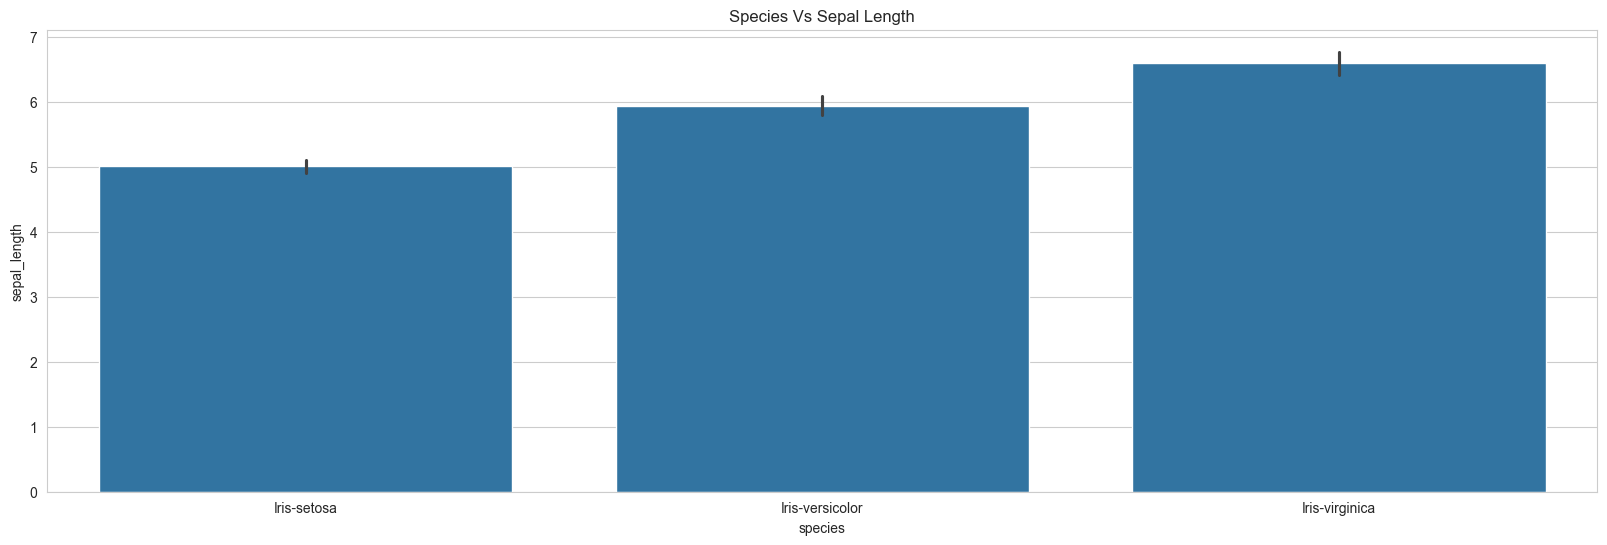

In [18]:
plt.figure(figsize=(20,6))
plt.title("Species Vs Sepal Length")
sns.barplot(data=iris, x='species', y= 'sepal_length')

In [13]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Species vs Sepal Width

<Axes: title={'center': 'Species Vs Sepal Width'}, xlabel='species', ylabel='sepal_width'>

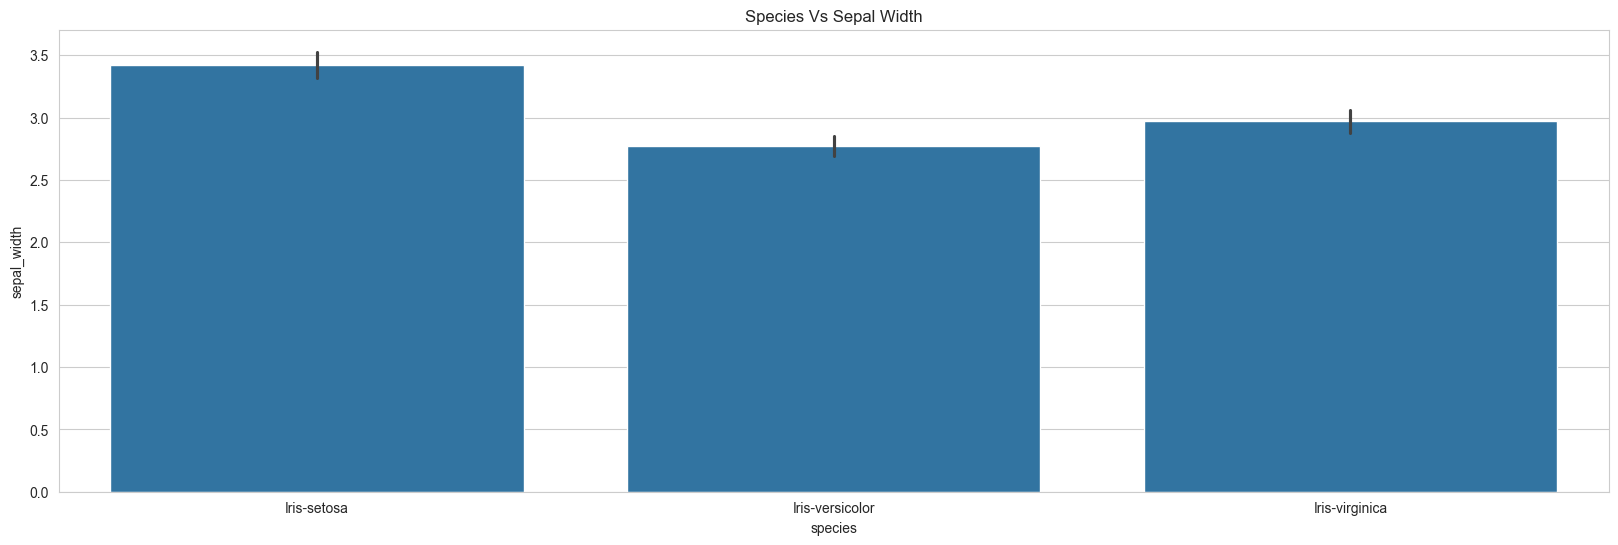

In [19]:
plt.figure(figsize=(20,6))
plt.title("Species Vs Sepal Width")
sns.barplot(data=iris, x='species', y= 'sepal_width')

## Species vs Petal Length

<Axes: title={'center': 'Species Vs Petal Length'}, xlabel='species', ylabel='petal_length'>

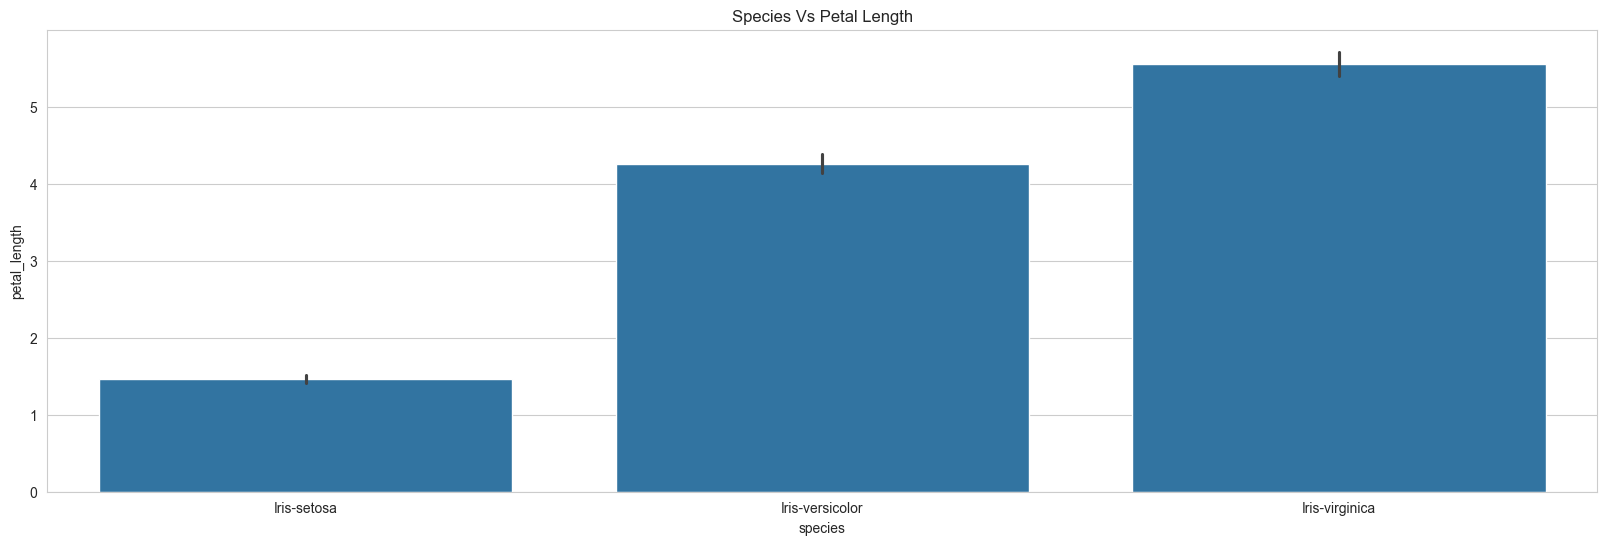

In [20]:
plt.figure(figsize=(20,6))
plt.title("Species Vs Petal Length")
sns.barplot(data=iris, x='species', y= 'petal_length')

## Species vs Petal Width

<Axes: title={'center': 'Species Vs Petal Width'}, xlabel='species', ylabel='petal_width'>

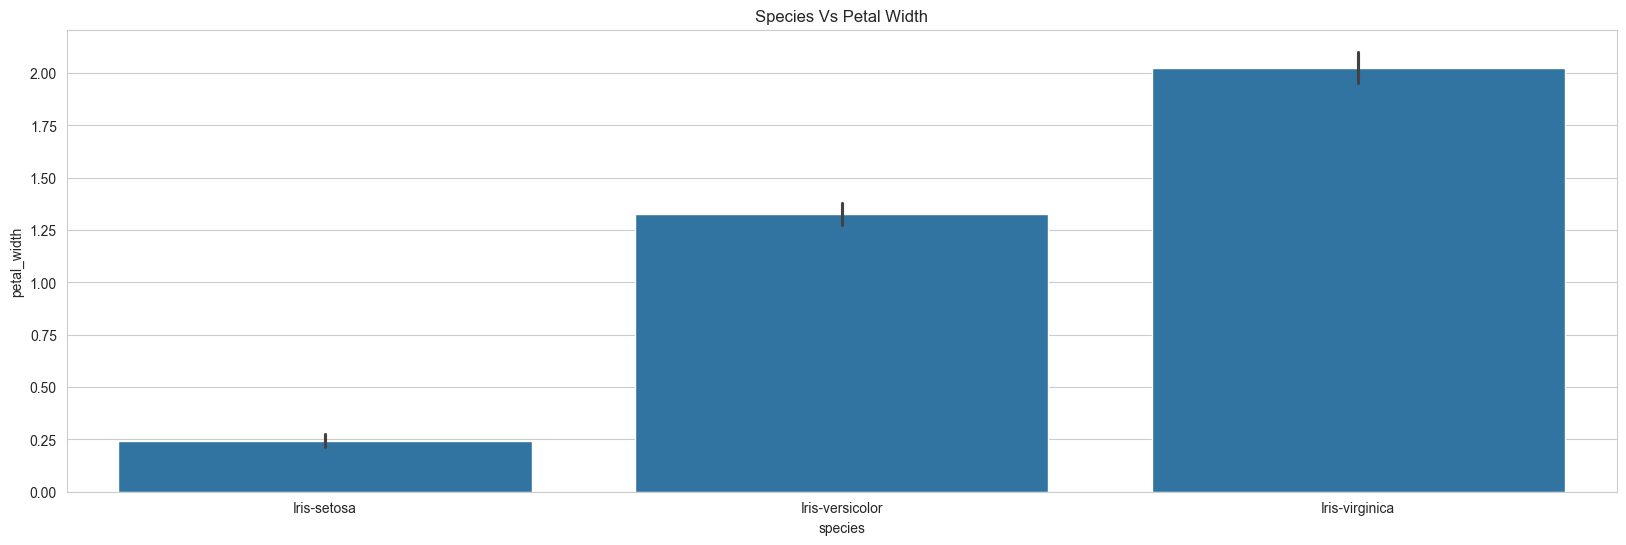

In [21]:
plt.figure(figsize=(20,6))
plt.title("Species Vs Petal Width")
sns.barplot(data=iris, x='species', y= 'petal_width')

## Heatmap Classification

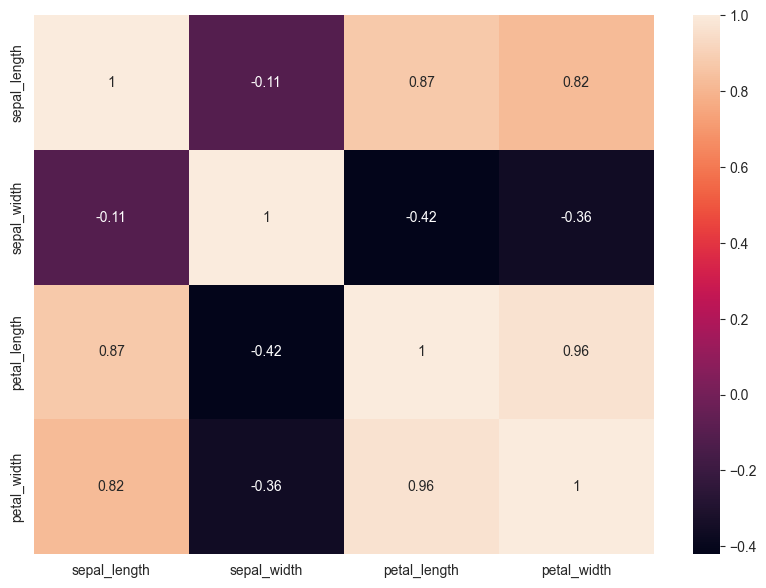

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(iris.drop('species', axis=1).corr(), annot=True)
plt.show()

## Pie Plot

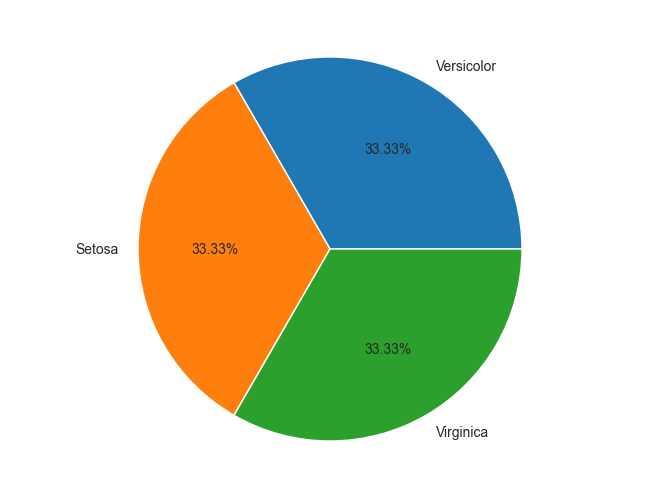

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [34]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Violin Plot

<Axes: xlabel='species', ylabel='sepal_width'>

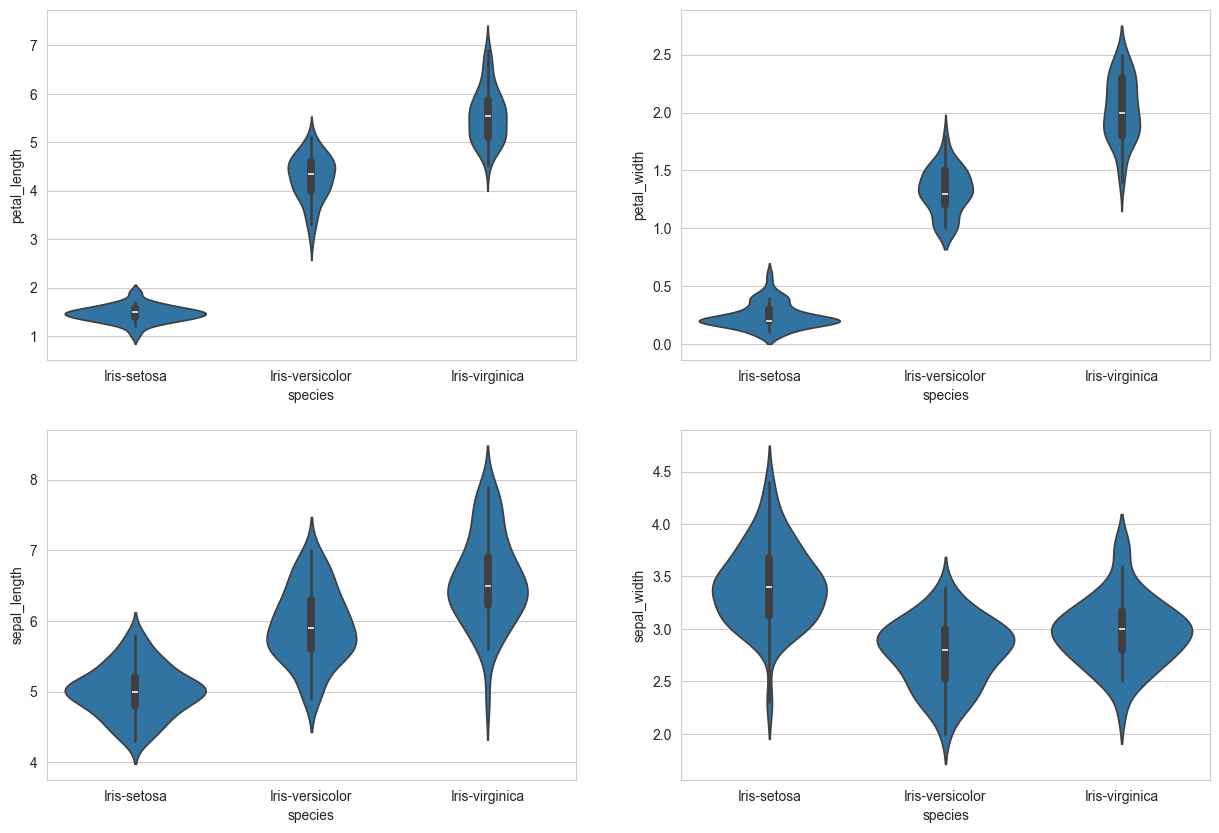

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

# Machine Learning Model

## Setting Features

In [23]:
x= iris.drop(['species'], axis=1)
y= iris['species']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)

DecisionTreeClassifier()

## Evaluation

In [26]:
from sklearn.metrics import accuracy_score
pred= dtr.predict(x_test)
accuracy_score(pred, y_test)

0.9666666666666667